In [1]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import pandas as pd
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
import os
os.environ["KMP_DUPLICATE_LIB_OK"]="TRUE"
os.environ['CUDA_VISIBLE_DEVICES'] = '-1'
from tensorflow.keras.callbacks import EarlyStopping
n_words = 5000
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.imdb.load_data(num_words=n_words)

es = EarlyStopping(monitor = "val_loss", mode = "min", patience = 5)

EPOCHS = 1000

#https://keras.io/api/datasets/imdb/

2025-01-13 13:47:43.309846: I tensorflow/core/util/port.cc:110] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-01-13 13:47:43.357609: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F AVX512_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2025-01-13 13:47:44.071425: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [2]:
#wyświetl pierwszy element zbioru X_train
X_train[0]

[1,
 14,
 22,
 16,
 43,
 530,
 973,
 1622,
 1385,
 65,
 458,
 4468,
 66,
 3941,
 4,
 173,
 36,
 256,
 5,
 25,
 100,
 43,
 838,
 112,
 50,
 670,
 2,
 9,
 35,
 480,
 284,
 5,
 150,
 4,
 172,
 112,
 167,
 2,
 336,
 385,
 39,
 4,
 172,
 4536,
 1111,
 17,
 546,
 38,
 13,
 447,
 4,
 192,
 50,
 16,
 6,
 147,
 2025,
 19,
 14,
 22,
 4,
 1920,
 4613,
 469,
 4,
 22,
 71,
 87,
 12,
 16,
 43,
 530,
 38,
 76,
 15,
 13,
 1247,
 4,
 22,
 17,
 515,
 17,
 12,
 16,
 626,
 18,
 2,
 5,
 62,
 386,
 12,
 8,
 316,
 8,
 106,
 5,
 4,
 2223,
 2,
 16,
 480,
 66,
 3785,
 33,
 4,
 130,
 12,
 16,
 38,
 619,
 5,
 25,
 124,
 51,
 36,
 135,
 48,
 25,
 1415,
 33,
 6,
 22,
 12,
 215,
 28,
 77,
 52,
 5,
 14,
 407,
 16,
 82,
 2,
 8,
 4,
 107,
 117,
 2,
 15,
 256,
 4,
 2,
 7,
 3766,
 5,
 723,
 36,
 71,
 43,
 530,
 476,
 26,
 400,
 317,
 46,
 7,
 4,
 2,
 1029,
 13,
 104,
 88,
 4,
 381,
 15,
 297,
 98,
 32,
 2071,
 56,
 26,
 141,
 6,
 194,
 2,
 18,
 4,
 226,
 22,
 21,
 134,
 476,
 26,
 480,
 5,
 144,
 30,
 2,
 18,
 51,
 36,
 

In [3]:
#wyświetl pierwszy element zbioru y_train
y_train[0]

1

In [4]:
#ta komórka słuzy dopełeniu ciągów wyrazów. Sieć ma stałą wielkość pierwszej warstwy. Zadania nie mają stałej 
#długości. Dlatego, każde zdanie, które będzie miało mniej niż 100 wyrazów dopełniamy zerami.

from tensorflow.keras.preprocessing.sequence import pad_sequences

max_words = 100

X_train_pad = pad_sequences(X_train, maxlen=max_words, padding="post")
X_test_pad = pad_sequences(X_test, maxlen=max_words, padding="post")

In [5]:
#kluczowa jest tu warstwa Embedding, w której ustawiamy wielkość słownika, w ilu wymiarach chcemy umieścić słowa 
#Na koniec ustawiamy jak długie są zdania, my ustaliliśmy, że mają 100 wyrazów.
#"Warstwa Embedding przekształca wejściowe liczby całkowite na wektory o 
#określonym wymiarze. Jest to zasadniczo macierz, gdzie każdy wiersz odpowiada wektorowi 
#osadzenia danego indeksu."


from tensorflow.keras.layers import Embedding, Flatten
model = Sequential()
model.add(Embedding(input_dim = n_words, output_dim = 16, input_length = max_words))
model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.summary()
model.compile(optimizer='adam',loss='binary_crossentropy', metrics=['accuracy'])
history = model.fit(X_train_pad,y_train, epochs = EPOCHS, validation_data = (X_test_pad,y_test), callbacks = [es])

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 100, 16)           80000     
                                                                 
 flatten (Flatten)           (None, 1600)              0         
                                                                 
 dense (Dense)               (None, 64)                102464    
                                                                 
 dense_1 (Dense)             (None, 1)                 65        
                                                                 
Total params: 182,529
Trainable params: 182,529
Non-trainable params: 0
_________________________________________________________________
Epoch 1/1000


2025-01-13 13:47:49.018170: E tensorflow/compiler/xla/stream_executor/cuda/cuda_driver.cc:266] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected
2025-01-13 13:47:49.018217: I tensorflow/compiler/xla/stream_executor/cuda/cuda_diagnostics.cc:168] retrieving CUDA diagnostic information for host: dziobak
2025-01-13 13:47:49.018225: I tensorflow/compiler/xla/stream_executor/cuda/cuda_diagnostics.cc:175] hostname: dziobak
2025-01-13 13:47:49.018355: I tensorflow/compiler/xla/stream_executor/cuda/cuda_diagnostics.cc:199] libcuda reported version is: 520.61.5
2025-01-13 13:47:49.018381: I tensorflow/compiler/xla/stream_executor/cuda/cuda_diagnostics.cc:203] kernel reported version is: 520.61.5
2025-01-13 13:47:49.018388: I tensorflow/compiler/xla/stream_executor/cuda/cuda_diagnostics.cc:309] kernel version seems to match DSO: 520.61.5


782/782 [==============================] - 6s 7ms/step - loss: 0.4431 - accuracy: 0.7766 - val_loss: 0.3492 - val_accuracy: 0.8454
Epoch 2/1000
782/782 [==============================] - 5s 6ms/step - loss: 0.2332 - accuracy: 0.9088 - val_loss: 0.3881 - val_accuracy: 0.8346
Epoch 3/1000
782/782 [==============================] - 5s 6ms/step - loss: 0.0906 - accuracy: 0.9705 - val_loss: 0.5411 - val_accuracy: 0.8211
Epoch 4/1000
782/782 [==============================] - 5s 7ms/step - loss: 0.0190 - accuracy: 0.9958 - val_loss: 0.7341 - val_accuracy: 0.8178
Epoch 5/1000
782/782 [==============================] - 5s 6ms/step - loss: 0.0033 - accuracy: 0.9997 - val_loss: 0.8345 - val_accuracy: 0.8228
Epoch 6/1000
782/782 [==============================] - 5s 6ms/step - loss: 7.9003e-04 - accuracy: 0.9999 - val_loss: 0.9008 - val_accuracy: 0.8225


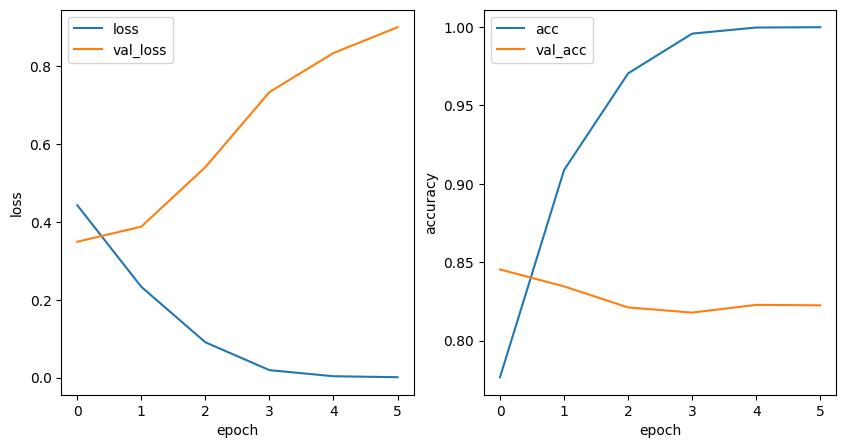

In [6]:
hist = pd.DataFrame(history.history)
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.plot(hist.loss, label = "loss")
plt.plot(hist.val_loss, label = "val_loss")
plt.xlabel("epoch")
plt.ylabel("loss")
plt.legend()

plt.subplot(1,2,2)
plt.plot(hist.accuracy, label = "acc")
plt.plot(hist.val_accuracy, label = "val_acc")
plt.xlabel("epoch")
plt.ylabel("accuracy")
plt.legend()